In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score




In [24]:
df=pd.read_csv('dataset.csv')

In [25]:
df.head(4)

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1


In [26]:
df.shape

(11055, 32)

<Axes: ylabel='count'>

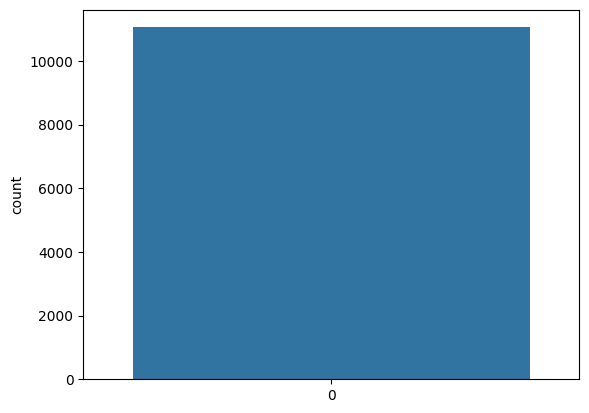

In [27]:
import seaborn as sns
sns.countplot(df['Result'])

In [28]:
col=df.columns
for i in col:
     if  i!='index':
        print(i,df[i].unique())

having_IPhaving_IP_Address [-1  1]
URLURL_Length [ 1  0 -1]
Shortining_Service [ 1 -1]
having_At_Symbol [ 1 -1]
double_slash_redirecting [-1  1]
Prefix_Suffix [-1  1]
having_Sub_Domain [-1  0  1]
SSLfinal_State [-1  1  0]
Domain_registeration_length [-1  1]
Favicon [ 1 -1]
port [ 1 -1]
HTTPS_token [-1  1]
Request_URL [ 1 -1]
URL_of_Anchor [-1  0  1]
Links_in_tags [ 1 -1  0]
SFH [-1  1  0]
Submitting_to_email [-1  1]
Abnormal_URL [-1  1]
Redirect [0 1]
on_mouseover [ 1 -1]
RightClick [ 1 -1]
popUpWidnow [ 1 -1]
Iframe [ 1 -1]
age_of_domain [-1  1]
DNSRecord [-1  1]
web_traffic [-1  0  1]
Page_Rank [-1  1]
Google_Index [ 1 -1]
Links_pointing_to_page [ 1  0 -1]
Statistical_report [-1  1]
Result [-1  1]


In [29]:
df['Result']=df['Result'].replace(-1,0)

In [30]:
print(df.corr()['Result'].sort_values())  

Domain_registeration_length   -0.225789
Shortining_Service            -0.067966
Abnormal_URL                  -0.060488
HTTPS_token                   -0.039854
double_slash_redirecting      -0.038608
Redirect                      -0.020113
Iframe                        -0.003394
Favicon                       -0.000280
popUpWidnow                    0.000086
index                          0.000978
RightClick                     0.012653
Submitting_to_email            0.018249
Links_pointing_to_page         0.032574
port                           0.036419
on_mouseover                   0.041838
having_At_Symbol               0.052948
URLURL_Length                  0.057430
DNSRecord                      0.075718
Statistical_report             0.079857
having_IPhaving_IP_Address     0.094160
Page_Rank                      0.104645
age_of_domain                  0.121496
Google_Index                   0.128950
SFH                            0.221419
Links_in_tags                  0.248229


<Axes: >

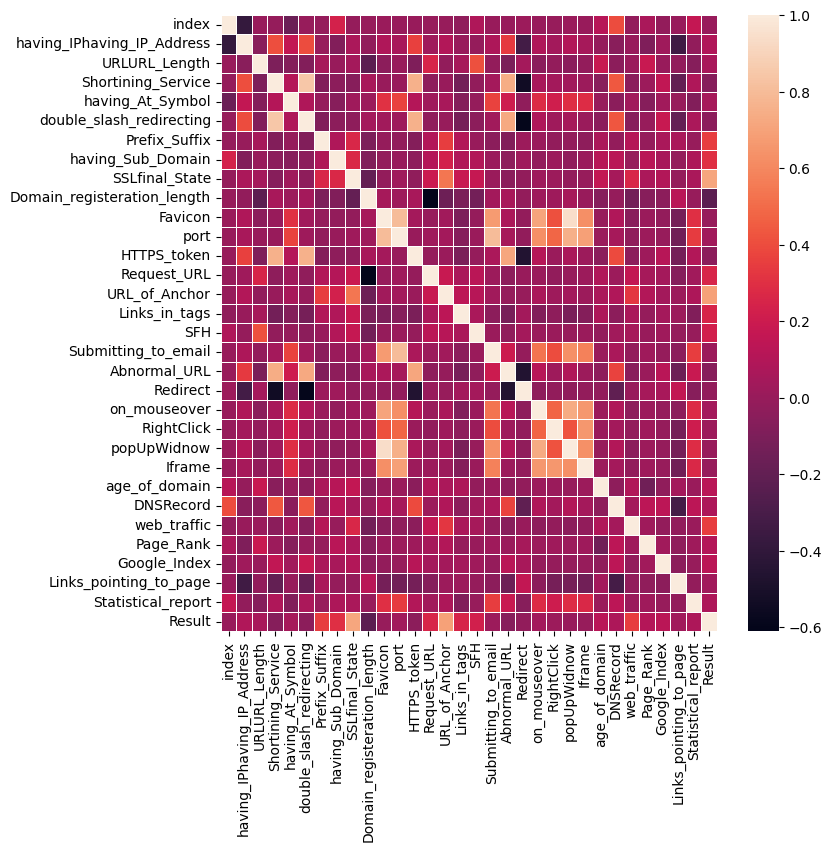

In [31]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), linewidths=.5)

In [35]:
X = df.drop('Result', axis=1)  # Replace 'target_variable' with the actual target variable column name
y = df['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Model Accuracy: {accuracy}')

Model Accuracy: 0.9651741293532339


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.tree import DecisionTreeClassifier
# Initialize and train the Decision Tree classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Model Accuracy: {accuracy}')





Model Accuracy: 0.9547715965626413


Test Set Accuracy: 0.9143546441495778
Validation Set Accuracy: 0.9264617239300783


C:\Users\acer\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


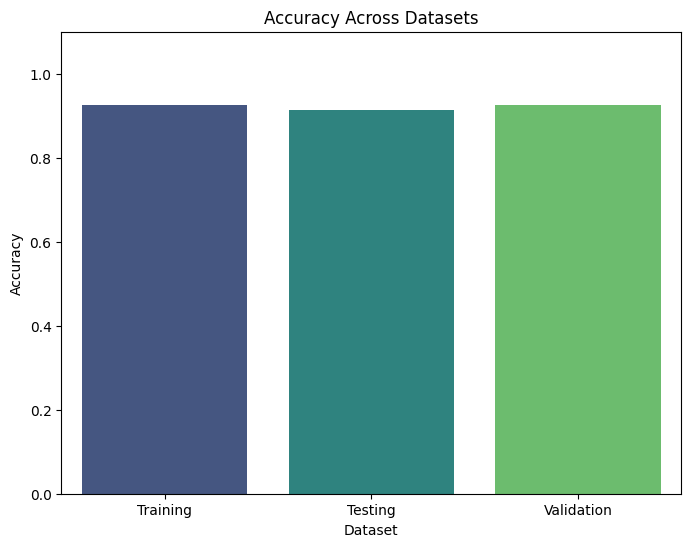

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
test_predictions = model.predict(X_test)

# Make predictions on the validation set
val_predictions = model.predict(X_val)

# Evaluate the model on test set
test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Test Set Accuracy: {test_accuracy}')

# Evaluate the model on validation set
val_accuracy = accuracy_score(y_val, val_predictions)
print(f'Validation Set Accuracy: {val_accuracy}')

# Draw countplot to visualize accuracy
accuracy_df = pd.DataFrame({
    'Dataset': ['Training', 'Testing', 'Validation'],
    'Accuracy': [model.score(X_train, y_train), test_accuracy, val_accuracy]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Dataset', y='Accuracy', data=accuracy_df, palette='viridis')
plt.title('Accuracy Across Datasets')
plt.ylim(0, 1.1)
plt.show()

In [40]:
tree = DecisionTreeClassifier(criterion='entropy') # function to measure the quality of split 
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
def display_result(df):
    for i in range (0,20,4):
        msg = df.drop(columns='Result')
        label = df["Result"].iloc[i]
        pred_label = tree.predict(msg)
        print(f"**Real: {label}, Predicted: {pred_label[i]}**")
        print("_______________________________________________________________")
        print()
        print()
display_result(df)

**Real: 0, Predicted: 0**
_______________________________________________________________


**Real: 1, Predicted: 1**
_______________________________________________________________


**Real: 1, Predicted: 1**
_______________________________________________________________


**Real: 0, Predicted: 0**
_______________________________________________________________


**Real: 0, Predicted: 0**
_______________________________________________________________




In [41]:
import pickle
pickle_out=open("tree.pkl","wb")
pickle.dump(tree,pickle_out)
pickle_out.close()

In [42]:
tree.predict([[1,1,-1,1,-1,1,-1,-1,1,-1,1,-1,-1,-1,1,-1,1,-1,1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1]])

C:\Users\acer\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [43]:
import os
os.getcwd()

'c:\\Users\\acer\\Documents\\phishing_sites'